#라이브러리 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:

path = '/content'
encoding = 'utf_8'

visit_area_info = pd.read_csv(path+'/tn_visit_area_info_방문지정보_H.csv', encoding=encoding)
travel = pd.read_csv(path+'/tn_travel_여행_H.csv', encoding=encoding)
traveller_master = pd.read_csv(path+'/tn_traveller_master_여행객 Master_H.csv', encoding=encoding)


In [3]:
visit_area_info

VISIT_AREA_ID  TRAVEL_ID  VISIT_ORDER     VISIT_AREA_NM  \
0         2306030001  e_e000295            1                 집   
1         2306030002  e_e000295            2  트레이더스 홀세일 클럽 안산점   
2         2306030003  e_e000295            3           백령 할인마트   
3         2306030007  e_e000295            4           아침 풍경펜션   
4         2306040001  e_e000295            5             사이 바다   
...              ...        ...          ...               ...   
46004     2309220002  h_h006874            2              꼬스뗀뇨   
46005     2309220003  h_h006874            3         마이 피기 팬트리   
46006     2309220004  h_h006874            4          월정리 해수욕장   
46007     2309220005  h_h006874            5        민경이네어등포해녀촌   
46008     2309220006  h_h006874            6           김정 문화회관   

      VISIT_START_YMD VISIT_END_YMD                 ROAD_NM_ADDR  \
0          2023-06-03    2023-06-03            경기 성남시 분당구 수내로 39   
1          2023-06-03    2023-06-03          경기 안산시 단원구 중앙대로 397   
2          2023-06-03    2023-06-03        인천 옹진군 영흥면 영흥로 164-10   
3          2023-06-03    2023-06-04   인천 옹진군 영흥면 영흥서로380번길 101-3   
4          2023-06-04    2023-06-04       인천 옹진군 영흥면 영흥북로 374-25   
...               ...           ...                          ...   
46004      2023-09-22    2023-09-22  제주특별자치도 제주시 구좌읍 해맞이해안로 2080   
46005      2023-09-22    2023-09-22      제주특별자치도 제주시 구좌읍 하도13길 6   
46006      2023-09-22    2023-09-22                          NaN   
46007      2023-09-22    2023-09-22   제주특별자치도 제주시 구좌읍 해맞이해안로 830   
46008      2023-09-22    2023-09-23        제주특별자치도 서귀포시 김정문화로 36   

                       LOTNO_ADDR     X_COORD    Y_COORD  ROAD_NM_CD  \
0              경기 성남시 분당구 수내동 1-1         NaN        NaN   3180039.0   
1             경기 안산시 단원구 신길동 1687  126.785016  37.331252         NaN   
2              인천 옹진군 영흥면 내리 8-31  126.493973  37.258358         NaN   
3           인천 옹진군 영흥면 내리 1212-32         NaN        NaN         NaN   
4           인천 옹진군 영흥면 내리 724-132         NaN        NaN         NaN   
...                           ...         ...        ...         ...   
46004     제주특별자치도 제주시 구좌읍 종달리 150  126.905244  33.509868         NaN   
46005  제주특별자치도 제주시 구좌읍 하도리 1091-5  126.888132  33.508700         NaN   
46006    제주특별자치도 제주시 구좌읍 월정리 33-3  126.795805  33.556469         NaN   
46007     제주특별자치도 제주시 구좌읍 행원리 102  126.825773  33.553735         NaN   
46008        제주특별자치도 서귀포시 강정동 176  126.508654  33.251086         NaN   

           LOTNO_CD             POI_ID          POI_NM  RESIDENCE_TIME_MIN  \
0      4.113510e+09                NaN             NaN                 NaN   
1               NaN  POI02001TR030421V  트레이더스홀세일클럽 안산점                90.0   
2               NaN  POI01000000E0UO1T          백령할인마트                30.0   
3               NaN  POI01000000894J66          아침풍경펜션               540.0   
4               NaN  POI010000006DU6YD            하이바다                60.0   
...             ...                ...             ...                 ...   
46004           NaN  POI01000TR019557V            꼬스뗀뇨                60.0   
46005           NaN  POI01000TR003070V         마이피기팬트리                30.0   
46006           NaN  POI01000TR025275V         월정리해수욕장               120.0   
46007           NaN  POI01000TR017746V      민경이네어등포해녀촌                30.0   
46008           NaN  POI010000006W62AG          김정문화회관               240.0   

       VISIT_AREA_TYPE_CD REVISIT_YN  VISIT_CHC_REASON_CD  LODGING_TYPE_CD  \
0                      21        NaN                  NaN              NaN   
1                       4          N                  6.0              NaN   
2                       4          N                  9.0              NaN   
3                      24          N                  6.0              3.0   
4                       4          N                  1.0              NaN   
...                   ...        ...                  ...              ...   
46004                   3          N             

# 전처리

## 1) visit_area_info 방문지 정보 df

In [4]:
# 관광지 선택
visit_area_info = visit_area_info[ (visit_area_info['VISIT_AREA_TYPE_CD'] == 1) |
                                  (visit_area_info['VISIT_AREA_TYPE_CD'] == 2) |
           (visit_area_info['VISIT_AREA_TYPE_CD'] == 3) | (visit_area_info['VISIT_AREA_TYPE_CD'] == 4) |
           (visit_area_info['VISIT_AREA_TYPE_CD'] == 5) | (visit_area_info['VISIT_AREA_TYPE_CD'] == 6) |
            (visit_area_info['VISIT_AREA_TYPE_CD'] == 7) | (visit_area_info['VISIT_AREA_TYPE_CD'] == 8)]

1-자연관광지


2-역사/유적/종교 시설 (문화재, 박물관, 촬영지, 절 등)


3-문화시설(공연장, 영화관, 전시관 등)


4-상업지구(거리, 시장, 쇼핑시설)


5-레저/스포츠 관련 시설(스키, 카트, 수상레저)


6-테마시설(놀이공원, 워터파크)


7-산책로, 둘레길 등


8-지역축제, 행사에 해당하는 방문지



In [5]:

#인덱스 재정렬
visit_area_info = visit_area_info.reset_index(drop = True)

In [6]:
visit_area_info

VISIT_AREA_ID  TRAVEL_ID  VISIT_ORDER     VISIT_AREA_NM  \
0         2306030002  e_e000295            2  트레이더스 홀세일 클럽 안산점   
1         2306030003  e_e000295            3           백령 할인마트   
2         2306040001  e_e000295            5             사이 바다   
3         2306100003  e_e000305            4      국립 무의도 자연휴양림   
4         2306100004  e_e000305            6            실미해수욕장   
...              ...        ...          ...               ...   
12791     2309230002  h_h006872            2            몸들 한 상   
12792     2309230003  h_h006872            3       항파두리 항몽 유적지   
12793     2309230005  h_h006872            5       제주시민복지타운 광장   
12794     2309220002  h_h006874            2              꼬스뗀뇨   
12795     2309220004  h_h006874            4          월정리 해수욕장   

      VISIT_START_YMD VISIT_END_YMD                 ROAD_NM_ADDR  \
0          2023-06-03    2023-06-03          경기 안산시 단원구 중앙대로 397   
1          2023-06-03    2023-06-03        인천 옹진군 영흥면 영흥로 164-10   
2          2023-06-04    2023-06-04       인천 옹진군 영흥면 영흥북로 374-25   
3          2023-06-10    2023-06-10                인천 중구 하나개로 74   
4          2023-06-10    2023-06-10               인천 중구 큰무리로 108   
...               ...           ...                          ...   
12791      2023-09-23    2023-09-23      제주특별자치도 제주시 애월읍 하가로 180   
12792      2023-09-23    2023-09-23     제주특별자치도 제주시 애월읍 항파두리로 50   
12793      2023-09-23    2023-09-23                          NaN   
12794      2023-09-22    2023-09-22  제주특별자치도 제주시 구좌읍 해맞이해안로 2080   
12795      2023-09-22    2023-09-22                          NaN   

                       LOTNO_ADDR     X_COORD    Y_COORD  ROAD_NM_CD  \
0             경기 안산시 단원구 신길동 1687  126.785016  37.331252         NaN   
1              인천 옹진군 영흥면 내리 8-31  126.493973  37.258358         NaN   
2           인천 옹진군 영흥면 내리 724-132         NaN        NaN         NaN   
3               인천 중구 무의동 산 151-1         NaN        NaN         NaN   
4                인천 중구 무의동 768-29         NaN        NaN         NaN   
...                           ...         ...        ...         ...   
12791  제주특별자치도 제주시 애월읍 하가리 1359-1  126.346979  33.455350         NaN   
12792    제주특별자치도 제주시 애월읍 상귀리 1012  126.407923  33.452748         NaN   
12793             제주특별자치도 제주시 도남동  126.522756  33.491676         NaN   
12794     제주특별자치도 제주시 구좌읍 종달리 150  126.905244  33.509868         NaN   
12795    제주특별자치도 제주시 구좌읍 월정리 33-3  126.795805  33.556469         NaN   

       LOTNO_CD             POI_ID          POI_NM  RESIDENCE_TIME_MIN  \
0           NaN  POI02001TR030421V  트레이더스홀세일클럽 안산점                90.0   
1           NaN  POI01000000E0UO1T          백령할인마트                30.0   
2           NaN  POI010000006DU6YD            하이바다                60.0   
3           NaN  POI01000TR010946V     무의도 국립자연휴양림                30.0   
4           NaN  POI02001TR018958V          실미해수욕장                60.0   
...         ...                ...             ...                 ...   
12791       NaN  POI01000000EWLE05            모들한상                60.0   
12792       NaN  POI01000TR003745V      항파두리 항몽유적지                30.0   
12793       NaN  POI03000TR027455V      제주시민복지타운광장                60.0   
12794       NaN  POI01000TR019557V            꼬스뗀뇨                60.0   
12795       NaN  POI01000TR025275V         월정리해수욕장               120.0   

       VISIT_AREA_TYPE_CD REVISIT_YN  VISIT_CHC_REASON_CD  LODGING_TYPE_CD  \
0                       4          N                  6.0              NaN   
1                       4          N                  9.0              NaN   
2                       4          N                  1.0              NaN   
3                       7          N                  2.0              NaN   
4                       1          N                  5.0              NaN   
...                   ...        ...                  ...              ...   
12791                   4          N                  8.0              NaN   
12792              

In [7]:
#제대로 추출되었는지 확인
visit_area_info['VISIT_AREA_TYPE_CD'].unique()

array([4, 7, 1, 3, 5, 2, 8, 6])

In [8]:
visit_area_info.dropna(subset = ['LOTNO_ADDR'], inplace = True)
visit_area_info = visit_area_info.reset_index(drop = True)

In [9]:
# 시도/군구 변수 생성
sido = []
gungu = []
eupmyeon = []
for i in range(len(visit_area_info['LOTNO_ADDR'])):
    sido.append(visit_area_info['LOTNO_ADDR'][i].split(' ')[0])
    gungu.append(visit_area_info['LOTNO_ADDR'][i].split(' ')[1])
    eupmyeon.append(visit_area_info['LOTNO_ADDR'][i].split(' ')[2])

In [10]:
visit_area_info['SIDO'] = sido
visit_area_info['GUNGU'] = gungu
visit_area_info['EUPMYEON'] = eupmyeon

### 변수 선택

TRAVEL_ID 여행 ID

VISIT_AREA_ID 방문장소 ID

VISIT_AREA_NM 방문 장소 이름

SIDO 시/도

GUNGU 군/구

VISIT_AREA_TYPE_CD 관광 장소 유형

DGSTFN 만족도

<s>REVISIT_INTENTION 재방문의향</s>

<s>RCMDTN_INTENTION 추천의향</s>

<s>RESIDENCE_TIME_MIN 체류시간분</s>

<s>REVISIT_YN 재방문여부</s>

In [11]:
visit_area_info

VISIT_AREA_ID  TRAVEL_ID  VISIT_ORDER     VISIT_AREA_NM  \
0         2306030002  e_e000295            2  트레이더스 홀세일 클럽 안산점   
1         2306030003  e_e000295            3           백령 할인마트   
2         2306040001  e_e000295            5             사이 바다   
3         2306100003  e_e000305            4      국립 무의도 자연휴양림   
4         2306100004  e_e000305            6            실미해수욕장   
...              ...        ...          ...               ...   
12110     2309230002  h_h006872            2            몸들 한 상   
12111     2309230003  h_h006872            3       항파두리 항몽 유적지   
12112     2309230005  h_h006872            5       제주시민복지타운 광장   
12113     2309220002  h_h006874            2              꼬스뗀뇨   
12114     2309220004  h_h006874            4          월정리 해수욕장   

      VISIT_START_YMD VISIT_END_YMD                 ROAD_NM_ADDR  \
0          2023-06-03    2023-06-03          경기 안산시 단원구 중앙대로 397   
1          2023-06-03    2023-06-03        인천 옹진군 영흥면 영흥로 164-10   
2          2023-06-04    2023-06-04       인천 옹진군 영흥면 영흥북로 374-25   
3          2023-06-10    2023-06-10                인천 중구 하나개로 74   
4          2023-06-10    2023-06-10               인천 중구 큰무리로 108   
...               ...           ...                          ...   
12110      2023-09-23    2023-09-23      제주특별자치도 제주시 애월읍 하가로 180   
12111      2023-09-23    2023-09-23     제주특별자치도 제주시 애월읍 항파두리로 50   
12112      2023-09-23    2023-09-23                          NaN   
12113      2023-09-22    2023-09-22  제주특별자치도 제주시 구좌읍 해맞이해안로 2080   
12114      2023-09-22    2023-09-22                          NaN   

                       LOTNO_ADDR     X_COORD    Y_COORD  ROAD_NM_CD  \
0             경기 안산시 단원구 신길동 1687  126.785016  37.331252         NaN   
1              인천 옹진군 영흥면 내리 8-31  126.493973  37.258358         NaN   
2           인천 옹진군 영흥면 내리 724-132         NaN        NaN         NaN   
3               인천 중구 무의동 산 151-1         NaN        NaN         NaN   
4                인천 중구 무의동 768-29         NaN        NaN         NaN   
...                           ...         ...        ...         ...   
12110  제주특별자치도 제주시 애월읍 하가리 1359-1  126.346979  33.455350         NaN   
12111    제주특별자치도 제주시 애월읍 상귀리 1012  126.407923  33.452748         NaN   
12112             제주특별자치도 제주시 도남동  126.522756  33.491676         NaN   
12113     제주특별자치도 제주시 구좌읍 종달리 150  126.905244  33.509868         NaN   
12114    제주특별자치도 제주시 구좌읍 월정리 33-3  126.795805  33.556469         NaN   

       LOTNO_CD             POI_ID          POI_NM  RESIDENCE_TIME_MIN  \
0           NaN  POI02001TR030421V  트레이더스홀세일클럽 안산점                90.0   
1           NaN  POI01000000E0UO1T          백령할인마트                30.0   
2           NaN  POI010000006DU6YD            하이바다                60.0   
3           NaN  POI01000TR010946V     무의도 국립자연휴양림                30.0   
4           NaN  POI02001TR018958V          실미해수욕장                60.0   
...         ...                ...             ...                 ...   
12110       NaN  POI01000000EWLE05            모들한상                60.0   
12111       NaN  POI01000TR003745V      항파두리 항몽유적지                30.0   
12112       NaN  POI03000TR027455V      제주시민복지타운광장                60.0   
12113       NaN  POI01000TR019557V            꼬스뗀뇨                60.0   
12114       NaN  POI01000TR025275V         월정리해수욕장               120.0   

       VISIT_AREA_TYPE_CD REVISIT_YN  VISIT_CHC_REASON_CD  LODGING_TYPE_CD  \
0                       4          N                  6.0              NaN   
1                       4          N                  9.0              NaN   
2                       4          N                  1.0              NaN   
3                       7          N                  2.0              NaN   
4                       1          N                  5.0              NaN   
...                   ...        ...                  ...              ...   
12110                   4          N                  8.0              NaN   
12111              

In [12]:
visit_area_info = visit_area_info[['TRAVEL_ID', 'VISIT_AREA_ID', 'VISIT_AREA_NM', 'SIDO', 'GUNGU', 'EUPMYEON', 'VISIT_AREA_TYPE_CD', 'DGSTFN','X_COORD','Y_COORD']]

In [13]:
visit_area_info['TRAVEL_ID'].value_counts()

TRAVEL_ID
h_h001406    27
h_h003742    26
h_h004654    21
h_h000707    20
h_h000768    20
             ..
e_e004200     1
g_g001911     1
e_e004244     1
e_e004260     1
g_g011535     1
Name: count, Length: 2460, dtype: int64

In [14]:
visit_area_info[visit_area_info['TRAVEL_ID'] == 'h_h001406']

TRAVEL_ID  VISIT_AREA_ID  VISIT_AREA_NM     SIDO GUNGU EUPMYEON  \
6256  h_h001406     2306220006            도두봉  제주특별자치도   제주시     도두일동   
6257  h_h001406     2306220007   도두동 무지개 해안도로  제주특별자치도   제주시     도두일동   
6258  h_h001406     2306220010            용두암  제주특별자치도   제주시     용담2동   
6259  h_h001406     2306220011        용연 구름다리  제주특별자치도   제주시     용담2동   
6260  h_h001406     2306220012     제주동문재래 야시장  제주특별자치도   제주시     이도일동   
6261  h_h001406     2306220013        젊은이의 광장  제주특별자치도   제주시      건입동   
6262  h_h001406     2306230002      이호 테우해수욕장  제주특별자치도   제주시     이호일동   
6263  h_h001406     2306230003           돌 염전  제주특별자치도   제주시      애월읍   
6264  h_h001406     2306230006           더마파크  제주특별자치도   제주시      한림읍   
6265  h_h001406     2306230007           비체올린  제주특별자치도   제주시      한경면   
6266  h_h001406     2306230009         싱계물 공원  제주특별자치도   제주시      한경면   
6267  h_h001406     2306230011            금오름  제주특별자치도   제주시      한림읍   
6268  h_h001406     2306240001         협재해수욕장  제주특별자치도   제주시      한림읍   
6269  h_h001406     2306240002         금능해수욕장  제주특별자치도   제주시      한림읍   
6270  h_h001406     2306240003  수월봉 전망대 지질트레일  제주특별자치도   제주시      한경면   
6271  h_h001406     2306240006            송악산  제주특별자치도  서귀포시      대정읍   
6272  h_h001406     2306240009        제주아트서커스  제주특별자치도  서귀포시      안덕면   
6273  h_h001406     2306240014            새연교  제주특별자치도  서귀포시      서홍동   
6274  h_h001406     2306240015          천지연폭포  제주특별자치도  서귀포시      서홍동   
6275  h_h001406     2306250001     외돌개( 선녀탕 )  제주특별자치도  서귀포시      서홍동   
6276  h_h001406     2306250003    서귀포 매일 올레시장  제주특별자치도  서귀포시      서귀동   
6277  h_h001406     2306250010         광치기 해변  제주특별자치도  서귀포시      성산읍   
6278  h_h001406     2306260001          성산일출봉  제주특별자치도  서귀포시      성산읍   
6279  h_h001406     2306260002         제주 아리랑  제주특별자치도  서귀포시      표선면   
6280  h_h001406     2306260005           섭지코지  제주특별자치도  서귀포시      성산읍   
6281  h_h001406     2306260007       성산 해안 도로  제주특별자치도  서귀포시      성산읍   
6282  h_h001406     2306260010         함덕해수욕장  제주특별자치도   제주시      조천읍   

      VISIT_AREA_TYPE_CD  DGSTFN     X_COORD    Y_COORD  
6256                   7     4.0  126.468372  33.507907  
6257                   1     4.0  126.471338  33.509118  
6258                   1     4.0  126.511957  33.516111  
6259                   1     4.0  126.514392  33.514883  
6260                   4     4.0  126.526017  33.511589  
6261                   1     4.0  126.526421  33.518078  
6262                   1     4.0  126.452691  33.497377  
6263                   1     4.0  126.376520  33.483414  
6264                   3     5.0  126.241505  33.355539  
6265                   8     5.0  126.218450  33.349464  
6266                   1     5.0  126.173849  33.343513  
6267                   1     4.0  126.305839  33.354572  
6268                   1     4.0  126.239158  33.393866  
6269                   1     4.0  126.235890  33.390449  
6270                   1     5.0  126.163465  33.294958  
6271                   1     4.0  126.289791  33.199083  
6272                   3     4.0  126.344811  33.314392  
6273                   1     4.0  126.558886  33.238532  
6274                   1     4.0  126.554522  33.247212  
6275                   1     4.0  126.544862  33.239034  
6276                   4     3.0  126.563232  33.250150  
6277                   1     4.0  126.923897  33.452317  
6278                   1     4.0  126.940538  33.459135  
6279                   3     4.0  126.778654  33.402731  
6280                   1     4.0  126.930609  33.423938  
6281                   1     4.0  126.936243  33.465960  
6282                   1     4.0  126.669239  33.543062

In [15]:
visit_area_info[visit_area_info['TRAVEL_ID'] == 'h_h003742' ]

TRAVEL_ID  VISIT_AREA_ID   VISIT_AREA_NM     SIDO GUNGU EUPMYEON  \
9754  h_h003742     2308310010       용두암 공영주차장  제주특별자치도   제주시     용담2동   
9755  h_h003742     2308310011        수목원길 야시장  제주특별자치도   제주시       연동   
9756  h_h003742     2308310012      제주동문재래 야시장  제주특별자치도   제주시     이도일동   
9757  h_h003742     2309010003         신화 워터파크  제주특별자치도  서귀포시      안덕면   
9758  h_h003742     2309010004         신화 테마파크  제주특별자치도  서귀포시      안덕면   
9759  h_h003742     2309010005          신화 테라스  제주특별자치도  서귀포시      안덕면   
9760  h_h003742     2309010009          노형수퍼마켙  제주특별자치도   제주시      해안동   
9761  h_h003742     2309020003            사계해변  제주특별자치도  서귀포시      안덕면   
9762  h_h003742     2309020004          산방산 랜드  제주특별자치도  서귀포시      안덕면   
9763  h_h003742     2309020005          포도 뮤지엄  제주특별자치도  서귀포시      안덕면   
9764  h_h003742     2309020006     문화 예술 공공수장고  제주특별자치도   제주시      한경면   
9765  h_h003742     2309020007         제주현대미술관  제주특별자치도   제주시      한경면   
9766  h_h003742     2309020008          여미지식물원  제주특별자치도  서귀포시      색달동   
9767  h_h003742     2309030003          허니문하우스  제주특별자치도  서귀포시      토평동   
9768  h_h003742     2309030004  윈드 1947카트 테마파크  제주특별자치도  서귀포시      토평동   
9769  h_h003742     2309030005      아쿠아 플라넷 제주  제주특별자치도  서귀포시      성산읍   
9770  h_h003742     2309040002            섭지코지  제주특별자치도  서귀포시      성산읍   
9771  h_h003742     2309040003           성산일출봉  제주특별자치도  서귀포시      성산읍   
9772  h_h003742     2309040008        우도 산호 해변  제주특별자치도   제주시      우도면   
9773  h_h003742     2309040011     우도물들이 해녀의 집  제주특별자치도   제주시      우도면   
9774  h_h003742     2309040015         하고수동 해변  제주특별자치도   제주시      우도면   
9775  h_h003742     2309040016           검멀레해변  제주특별자치도   제주시      우도면   
9776  h_h003742     2309040022            세화해변  제주특별자치도   제주시      구좌읍   
9777  h_h003742     2309040023        월정리 해수욕장  제주특별자치도   제주시      구좌읍   
9778  h_h003742     2309040024          김녕해수욕장  제주특별자치도   제주시      구좌읍   
9779  h_h003742     2309040025          함덕해수욕장  제주특별자치도   제주시      조천읍   

      VISIT_AREA_TYPE_CD  DGSTFN     X_COORD    Y_COORD  
9754                   7     5.0  126.512114  33.514914  
9755                   4     5.0  126.487886  33.470142  
9756                   4     5.0  126.526017  33.511589  
9757                   6     5.0  126.315399  33.306074  
9758                   6     5.0  126.315282  33.304759  
9759                   4     5.0  126.316742  33.305892  
9760                   3     5.0  126.455356  33.464825  
9761                   1     5.0  126.308598  33.228658  
9762                   7     5.0  126.311703  33.233786  
9763                   3     5.0  126.385970  33.319273  
9764                   3     5.0  126.264947  33.337064  
9765                   3     5.0  126.265585  33.339663  
9766                   3     5.0  126.414260  33.252607  
9767                   2     5.0  126.578713  33.244155  
9768                   5     5.0  126.588827  33.289519  
9769                   3     5.0  126.927846  33.433068  
9770                   1     5.0  126.930609  33.423938  
9771                   1     5.0  126.940538  33.459135  
9772                   1     5.0  126.943048  33.502406  
9773                   1     5.0  126.950401  33.522915  
9774                   1     5.0  126.957648  33.514151  
9775                   1     5.0  126.966903  33.497171  
9776                   1     5.0  126.860256  33.525144  
9777                   1     5.0  126.795805  33.556469  
9778                   1     5.0  126.759314  33.557439  
9779                   1     5.0  126.669239  33.543062

In [16]:
visit_area_info['SIDO'].value_counts()

SIDO
제주특별자치도    8578
인천          634
전남          626
경남          431
경기          274
전북          228
충남          226
경북          209
강원특별자치도     208
부산          206
서울          179
강원          130
충북           89
대전           28
광주           27
울산           20
대구           14
세종특별자치시       5
대전광역시         1
전라남도          1
부산광역시         1
Name: count, dtype: int64

## 2) travel 여행 정보 df

In [17]:
travel.head()

TRAVEL_ID TRAVEL_NM TRAVELER_ID TRAVEL_PURPOSE TRAVEL_START_YMD  \
0  e_e000295       E03     e000295    21;22;4;7;8       2023-06-03   
1  e_e000305       H02     e000305     12;2;21;27       2023-06-09   
2  e_e000335       H02     e000335    1;22;26;4;6       2023-06-17   
3  e_e000365       H02     e000365  24;26;27;28;5       2023-05-27   
4  e_e000401       H02     e000401  1;10;21;23;24       2023-05-27   

  TRAVEL_END_YMD MVMN_NM                             TRAVEL_PERSONA  \
0     2023-06-05     자가용           제주,도서지역 방문/거주지 구분 없음/39세 이하/특별미션   
1     2023-06-11     자가용      제주,도서지역 방문/거주지 구분 없음/39세 이하/자녀동반/일반미션   
2     2023-06-18     자가용        제주,도서지역 방문/거주지 구분 없음/39세 이하/커플/일반미션   
3     2023-05-30  대중교통 등  제주,도서지역 방문/거주지 구분 없음/40세 이상/3인 이상 친구/일반미션   
4     2023-05-30     자가용        제주,도서지역 방문/거주지 구분 없음/39세 이하/부부/일반미션   

  TRAVEL_MISSION TRAVEL_MISSION_CHECK  
0    21;22;4;7;8               7;1;22  
1     12;2;21;27             22;21;27  
2    1;22;26;4;6               1;6;26  
3  24;26;27;28;5              5;11;12  
4  1;10;21;23;24              1;23;21

### 변수 선택

TRAVEL_ID: 여행 ID

TRAVELER_ID: 여행자 ID

MVMN_NM: 주요 이동수단

In [18]:
travel = travel[['TRAVEL_ID', 'TRAVELER_ID', 'MVMN_NM']]

travel.head()

TRAVEL_ID TRAVELER_ID MVMN_NM
0  e_e000295     e000295     자가용
1  e_e000305     e000305     자가용
2  e_e000335     e000335     자가용
3  e_e000365     e000365  대중교통 등
4  e_e000401     e000401     자가용

In [19]:
# 결측값 확인
missing_values = travel.isnull().sum()
print(missing_values)

TRAVEL_ID        0
TRAVELER_ID      0
MVMN_NM        197
dtype: int64


In [20]:
# 결측값 대체 >> 자가용
travel['MVMN_NM'].fillna('자가용', inplace=True)

## 3) traveller_master 여행자 정보 df

### 변수 선택

TRAVELER_ID 여행객ID

GENDER 성별

AGE_GRP 연령대

INCOME 소득

TRAVEL_STYL(1,4,5,6,8) 여행 스타일

TRAVEL_MOVTIVE(1) 여행 동기 - 2,3은 결측치가 있어 제외

TRAVEL_COMPANIONS_NUM 동반자 수


In [21]:
traveller_master

TRAVELER_ID  RESIDENCE_SGG_CD GENDER  AGE_GRP  EDU_NM  EDU_FNSH_SE  \
0        g003414                30      남       20       5            1   
1        h006468                50      남       40       7            1   
2        h003272                50      여       50       7            1   
3        h006175                27      여       20       7            1   
4        e000899                11      여       30       6            1   
...          ...               ...    ...      ...     ...          ...   
2555     f004009                27      여       30       6            1   
2556     g002531                41      여       40       6            1   
2557     e002496                30      여       50       6            1   
2558     h003082                11      남       20       6            2   
2559     h003638                30      여       30       6            1   

      MARR_STTS  FAMILY_MEMB  JOB_NM  JOB_ETC  INCOME  HOUSE_INCOME  \
0             1            1       3      NaN       1           NaN   
1             2            3       1      NaN       8           8.0   
2             1            1       2      NaN       4           NaN   
3             1            3       2      NaN       6           6.0   
4             1            3       2      NaN       5          10.0   
...         ...          ...     ...      ...     ...           ...   
2555          1            1       4      NaN       4           NaN   
2556          2            4      11      NaN       2           7.0   
2557          2            2       3      NaN       3           7.0   
2558          1            1       3      NaN       4           NaN   
2559          1            4       3      NaN       4          12.0   

      TRAVEL_TERM  TRAVEL_NUM  TRAVEL_LIKE_SIDO_1  TRAVEL_LIKE_SGG_1  \
0               2           2                  27              27290   
1               2           2                  50              50130   
2               2           1                  50              50130   
3               3           2                  26              26350   
4               2           1                  42              42150   
...           ...         ...                 ...                ...   
2555            1           1                  27              27140   
2556            2           3                  44              44825   
2557            2           3                  43              43730   
2558            2           1                  42              42830   
2559            3           3                  50              50130   

      TRAVEL_LIKE_SIDO_2  TRAVEL_LIKE_SGG_2  TRAVEL_LIKE_SIDO_3  \
0                     26              26290                  47   
1                     50              50110                  30   
2                     50              50110                  42   
3                     26              26710                  47   
4                     50              50130                  41   
...                  ...                ...                 ...   
2555                  47              47290                  11   
2556                  42              42830                  44   
2557                  44              44150                  41   
2558                  50              50130                  26   
2559                  26              26350                  42   

      TRAVEL_LIKE_SGG_3  TRAVEL_STYL_1  TRAVEL_STYL_2  TRAVEL_STYL_3  \
0                 47110              3              4              2   
1                 30140              1              1              1   
2                 42170              3              4              4   
3                 47110              4              5              4   
4                 41650              3              2              4   
...                 ...            ...            ...            ...   
2555              11650              1              1              1   
2556 

In [22]:
traveller_master = traveller_master[['TRAVELER_ID', 'GENDER', 'AGE_GRP', 'INCOME', 'TRAVEL_STYL_1',
                                     'TRAVEL_STYL_4', 'TRAVEL_STYL_5',
                                     'TRAVEL_STYL_6', 'TRAVEL_STYL_8',
                                      'TRAVEL_MOTIVE_1', 'TRAVEL_COMPANIONS_NUM' ]]

1- 자연 vs 도시

<s>2- 숙박 vs 당일</s>

<s>3- 새로운 지역 vs 익숙한 지역</s>

4- 편하지만 비싼 숙소 vs 불편하지만 저렴한 숙소

5- 휴양/휴식 vs 체험활동

6- 잘 알려지지 않은 방문지 vs 알려진 방문지

<s>7- 계획에 따른 여행 vs 상황에 다른 여행</s>

8- 사진촬영 중요하지 않음 vs 사진 촬영 중요

In [23]:
# 성별 데이터 일단 원핫 인코딩
traveller_master['GENDER'].replace({'남':0, '여':1}, inplace=True)
traveller_master.head()

TRAVELER_ID  GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  TRAVEL_STYL_4  \
0     g003414       0       20       1              3              3   
1     h006468       0       40       8              1              1   
2     h003272       1       50       4              3              4   
3     h006175       1       20       6              4              1   
4     e000899       1       30       5              3              3   

   TRAVEL_STYL_5  TRAVEL_STYL_6  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  \
0              6              3              7                1   
1              1              1              6                8   
2              5              2              5                6   
3              4              4              5                1   
4              4              5              3                2   

   TRAVEL_COMPANIONS_NUM  
0                      1  
1                      2  
2                      0  
3                      0  
4                      2

travel df는 가져올게 교통수단밖에 없어서 사실 그렇게까지 의미 x

## 데이터 프레임 합치기

In [24]:
df = pd.merge(travel, traveller_master, left_on = 'TRAVELER_ID', right_on = 'TRAVELER_ID', how = 'inner')

In [25]:
df = pd.merge(visit_area_info, df, left_on = 'TRAVEL_ID', right_on = 'TRAVEL_ID', how = 'right')

In [26]:
len(df['TRAVEL_ID'].unique())

2560

In [27]:
df['TRAVELER_ID'].value_counts()

TRAVELER_ID
h001406    27
h003742    26
h004654    21
h000707    20
h000768    20
           ..
g003263     1
g003254     1
e006466     1
g003231     1
e003606     1
Name: count, Length: 2560, dtype: int64

In [28]:
df[df['TRAVELER_ID']=='h001406']

TRAVEL_ID  VISIT_AREA_ID  VISIT_AREA_NM     SIDO GUNGU EUPMYEON  \
6330  h_h001406   2.306220e+09            도두봉  제주특별자치도   제주시     도두일동   
6331  h_h001406   2.306220e+09   도두동 무지개 해안도로  제주특별자치도   제주시     도두일동   
6332  h_h001406   2.306220e+09            용두암  제주특별자치도   제주시     용담2동   
6333  h_h001406   2.306220e+09        용연 구름다리  제주특별자치도   제주시     용담2동   
6334  h_h001406   2.306220e+09     제주동문재래 야시장  제주특별자치도   제주시     이도일동   
6335  h_h001406   2.306220e+09        젊은이의 광장  제주특별자치도   제주시      건입동   
6336  h_h001406   2.306230e+09      이호 테우해수욕장  제주특별자치도   제주시     이호일동   
6337  h_h001406   2.306230e+09           돌 염전  제주특별자치도   제주시      애월읍   
6338  h_h001406   2.306230e+09           더마파크  제주특별자치도   제주시      한림읍   
6339  h_h001406   2.306230e+09           비체올린  제주특별자치도   제주시      한경면   
6340  h_h001406   2.306230e+09         싱계물 공원  제주특별자치도   제주시      한경면   
6341  h_h001406   2.306230e+09            금오름  제주특별자치도   제주시      한림읍   
6342  h_h001406   2.306240e+09         협재해수욕장  제주특별자치도   제주시      한림읍   
6343  h_h001406   2.306240e+09         금능해수욕장  제주특별자치도   제주시      한림읍   
6344  h_h001406   2.306240e+09  수월봉 전망대 지질트레일  제주특별자치도   제주시      한경면   
6345  h_h001406   2.306240e+09            송악산  제주특별자치도  서귀포시      대정읍   
6346  h_h001406   2.306240e+09        제주아트서커스  제주특별자치도  서귀포시      안덕면   
6347  h_h001406   2.306240e+09            새연교  제주특별자치도  서귀포시      서홍동   
6348  h_h001406   2.306240e+09          천지연폭포  제주특별자치도  서귀포시      서홍동   
6349  h_h001406   2.306250e+09     외돌개( 선녀탕 )  제주특별자치도  서귀포시      서홍동   
6350  h_h001406   2.306250e+09    서귀포 매일 올레시장  제주특별자치도  서귀포시      서귀동   
6351  h_h001406   2.306250e+09         광치기 해변  제주특별자치도  서귀포시      성산읍   
6352  h_h001406   2.306260e+09          성산일출봉  제주특별자치도  서귀포시      성산읍   
6353  h_h001406   2.306260e+09         제주 아리랑  제주특별자치도  서귀포시      표선면   
6354  h_h001406   2.306260e+09           섭지코지  제주특별자치도  서귀포시      성산읍   
6355  h_h001406   2.306260e+09       성산 해안 도로  제주특별자치도  서귀포시      성산읍   
6356  h_h001406   2.306260e+09         함덕해수욕장  제주특별자치도   제주시      조천읍   

      VISIT_AREA_TYPE_CD  DGSTFN     X_COORD    Y_COORD TRAVELER_ID MVMN_NM  \
6330                 7.0     4.0  126.468372  33.507907     h001406  대중교통 등   
6331                 1.0     4.0  126.471338  33.509118     h001406  대중교통 등   
6332                 1.0     4.0  126.511957  33.516111     h001406  대중교통 등   
6333                 1.0     4.0  126.514392  33.514883     h001406  대중교통 등   
6334                 4.0     4.0  126.526017  33.511589     h001406  대중교통 등   
6335                 1.0     4.0  126.526421  33.518078     h001406  대중교통 등   
6336                 1.0     4.0  126.452691  33.497377     h001406  대중교통 등   
6337                 1.0     4.0  126.376520  33.483414     h001406  대중교통 등   
6338                 3.0     5.0  126.241505  33.355539     h001406  대중교통 등   
6339                 8.0     5.0  126.218450  33.349464     h001406  대중교통 등   
6340                 1.0     5.0  126.173849  33.343513     h001406  대중교통 등   
6341                 1.0     4.0  126.305839  33.354572     h001406  대중교통 등   
6342                 1.0     4.0  126.239158  33.393866     h001406  대중교통 등   
6343                 1.0     4.0  126.235890  33.390449     h001406  대중교통 등   
6344                 1.0     5.0  126.163465  33.294958     h001406  대중교통 등   
6345                 1.0     4.0  126.289791  33.199083     h001406  대중교통 등   
6346                 3.0     4.0  126.344811  33.314392     h001406  대중교통 등   
6347                 1.0     4.0  126.558886  33.238532     h001406  대중교통 등   
6348                 1.0     4.0  126.554522  33.247212     h001406  대중교통 등   
6349                 1.0     4.0  126.544862  33.239034     h001406  대중교통 등   
6350                 4.0     3.0  126.563232  33.250150     h001406  대중교통 등   
6351                 1.0     4.0  126.923897  33.452317     h001406  대중교통 등   
6352                 1.0     4.0  126.940538  33.459135     h001406  대중교통 등   
6353                 3.0     4.0  126.778654  33.402731     h0014

In [29]:
df.head()

TRAVEL_ID  VISIT_AREA_ID     VISIT_AREA_NM SIDO GUNGU EUPMYEON  \
0  e_e000295   2.306030e+09  트레이더스 홀세일 클럽 안산점   경기   안산시      단원구   
1  e_e000295   2.306030e+09           백령 할인마트   인천   옹진군      영흥면   
2  e_e000295   2.306040e+09             사이 바다   인천   옹진군      영흥면   
3  e_e000305   2.306100e+09      국립 무의도 자연휴양림   인천    중구      무의동   
4  e_e000305   2.306100e+09            실미해수욕장   인천    중구      무의동   

   VISIT_AREA_TYPE_CD  DGSTFN     X_COORD    Y_COORD TRAVELER_ID MVMN_NM  \
0                 4.0     5.0  126.785016  37.331252     e000295     자가용   
1                 4.0     5.0  126.493973  37.258358     e000295     자가용   
2                 4.0     3.0         NaN        NaN     e000295     자가용   
3                 7.0     3.0         NaN        NaN     e000305     자가용   
4                 1.0     1.0         NaN        NaN     e000305     자가용   

   GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  TRAVEL_STYL_4  TRAVEL_STYL_5  \
0       0       20       4              4              3              4   
1       0       20       4              4              3              4   
2       0       20       4              4              3              4   
3       0       30       6              1              1              1   
4       0       30       6              1              1              1   

   TRAVEL_STYL_6  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_COMPANIONS_NUM  
0              6              7                3                     12  
1              6              7                3                     12  
2              6              7                3                     12  
3              1              1                1                      3  
4              1              1                1                      3

# EDA

## 1) 중복 데이터 및 기타 도서지역 데이터 삭제

In [30]:
# 중복 데이터
df.duplicated().sum()

0

In [31]:
# 중복 데이터 제거
df = df.drop_duplicates()
df.head()

TRAVEL_ID  VISIT_AREA_ID     VISIT_AREA_NM SIDO GUNGU EUPMYEON  \
0  e_e000295   2.306030e+09  트레이더스 홀세일 클럽 안산점   경기   안산시      단원구   
1  e_e000295   2.306030e+09           백령 할인마트   인천   옹진군      영흥면   
2  e_e000295   2.306040e+09             사이 바다   인천   옹진군      영흥면   
3  e_e000305   2.306100e+09      국립 무의도 자연휴양림   인천    중구      무의동   
4  e_e000305   2.306100e+09            실미해수욕장   인천    중구      무의동   

   VISIT_AREA_TYPE_CD  DGSTFN     X_COORD    Y_COORD TRAVELER_ID MVMN_NM  \
0                 4.0     5.0  126.785016  37.331252     e000295     자가용   
1                 4.0     5.0  126.493973  37.258358     e000295     자가용   
2                 4.0     3.0         NaN        NaN     e000295     자가용   
3                 7.0     3.0         NaN        NaN     e000305     자가용   
4                 1.0     1.0         NaN        NaN     e000305     자가용   

   GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  TRAVEL_STYL_4  TRAVEL_STYL_5  \
0       0       20       4              4              3              4   
1       0       20       4              4              3              4   
2       0       20       4              4              3              4   
3       0       30       6              1              1              1   
4       0       30       6              1              1              1   

   TRAVEL_STYL_6  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_COMPANIONS_NUM  
0              6              7                3                     12  
1              6              7                3                     12  
2              6              7                3                     12  
3              1              1                1                      3  
4              1              1                1                      3

In [32]:
# 도서지역 데이터 수 확인
df['SIDO'].value_counts()

SIDO
제주특별자치도    8578
인천          634
전남          626
경남          431
경기          274
전북          228
충남          226
경북          209
강원특별자치도     208
부산          206
서울          179
강원          130
충북           89
대전           28
광주           27
울산           20
대구           14
세종특별자치시       5
대전광역시         1
전라남도          1
부산광역시         1
Name: count, dtype: int64

In [33]:
df.loc[df['SIDO'] != '제주특별자치도', 'SIDO'].value_counts().sum()

3537

In [34]:
# 기타 도서지역 데이터 삭제
df.drop(df[df['SIDO'] != '제주특별자치도'].index, inplace=True)

In [35]:
df.loc[df['SIDO'] != '제주특별자치도', 'SIDO'].value_counts().sum()

0

In [36]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8578 entries, 3106 to 12214
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TRAVEL_ID              8578 non-null   object 
 1   VISIT_AREA_ID          8578 non-null   float64
 2   VISIT_AREA_NM          8578 non-null   object 
 3   SIDO                   8578 non-null   object 
 4   GUNGU                  8578 non-null   object 
 5   EUPMYEON               8578 non-null   object 
 6   VISIT_AREA_TYPE_CD     8578 non-null   float64
 7   DGSTFN                 8578 non-null   float64
 8   X_COORD                8388 non-null   float64
 9   Y_COORD                8388 non-null   float64
 10  TRAVELER_ID            8578 non-null   object 
 11  MVMN_NM                8578 non-null   object 
 12  GENDER                 8578 non-null   int64  
 13  AGE_GRP                8578 non-null   int64  
 14  INCOME                 8578 non-null   int64  
 15  TRAVE

## 2) 시각화

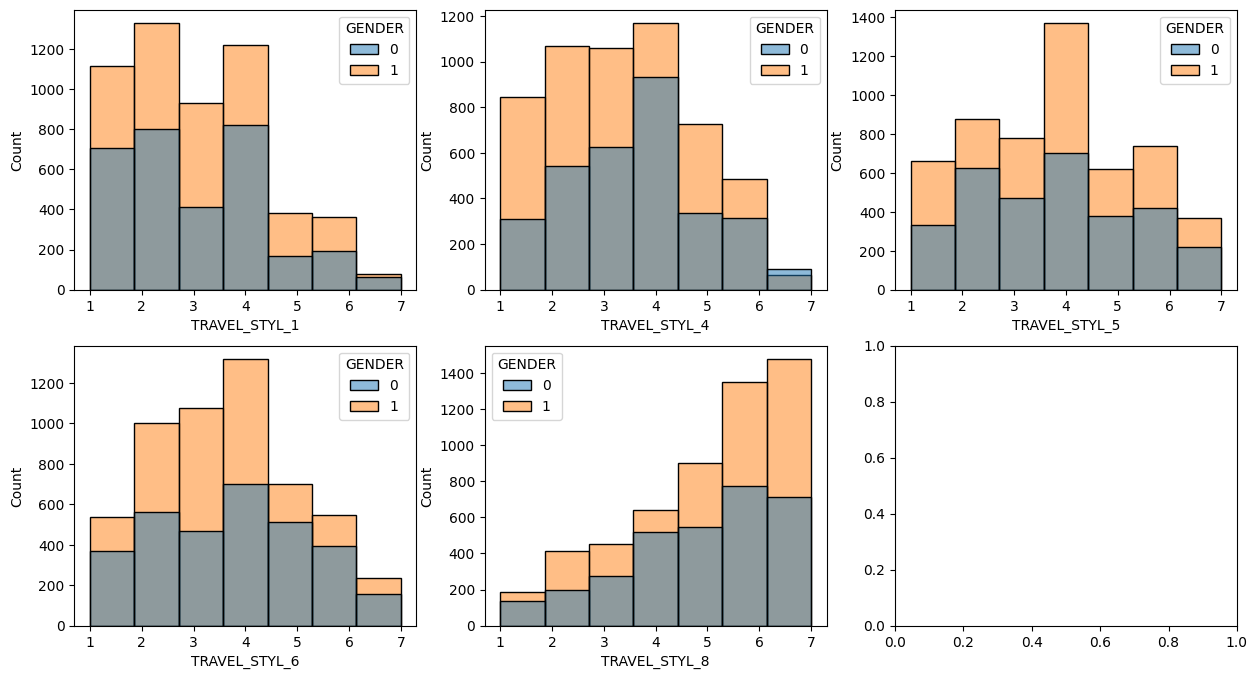

In [37]:
# 성별에 따른 여행스타일
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 8))

sns.histplot(data=df, x='TRAVEL_STYL_1', hue='GENDER', bins=7, ax=ax[0, 0])
sns.histplot(data=df, x='TRAVEL_STYL_4', hue='GENDER', bins=7, ax=ax[0, 1])
sns.histplot(data=df, x='TRAVEL_STYL_5', hue='GENDER', bins=7, ax=ax[0, 2])
sns.histplot(data=df, x='TRAVEL_STYL_6', hue='GENDER', bins=7, ax=ax[1, 0])
sns.histplot(data=df, x='TRAVEL_STYL_8', hue='GENDER', bins=7, ax=ax[1, 1])

plt.show()

TRAVEL_STYL_1 : 남녀 모두 자연 여행지 압도적으로 선호


TRAVEL_STYL_4 : 여자는 편하지만 비싼 숙소 선호, But 남자는 여자만큼 선호도가 뚜렷하지 않음


TRAVEL_STYL_5 : 남녀 모두 휴양/휴식 or 체험활동 고루 선호


TRAVEL_STYL_6 : 남녀 모두 잘 알려지지 않은 방문지를 미세하게 선호하나 비슷함


TRAVEL_sTYL_8 : 여자는 사진이 매우 중요, 남자는 중요하긴 한데 비슷비슷

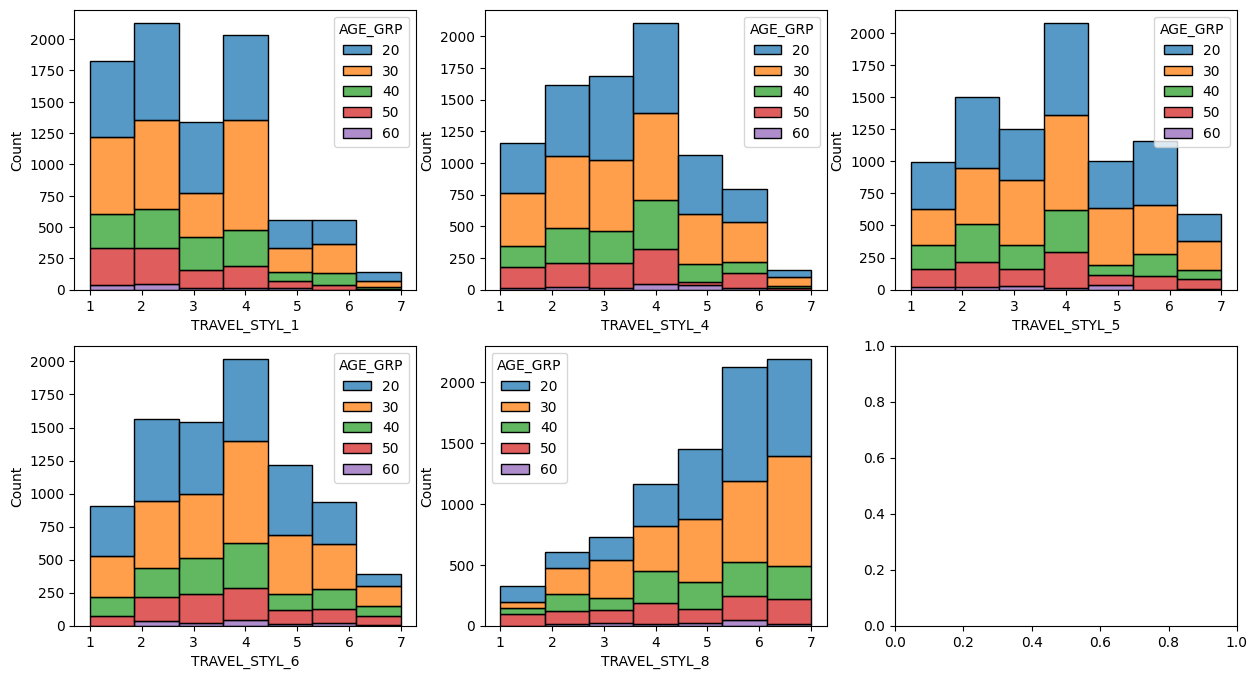

In [38]:
# 연령대에 따른 여행스타일
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 8))
my_palette = sns.color_palette("tab10")

sns.histplot(data=df, x='TRAVEL_STYL_1', hue='AGE_GRP', bins=7, ax=ax[0, 0], palette=my_palette, multiple='stack')
sns.histplot(data=df, x='TRAVEL_STYL_4', hue='AGE_GRP', bins=7, ax=ax[0, 1], palette=my_palette, multiple='stack')
sns.histplot(data=df, x='TRAVEL_STYL_5', hue='AGE_GRP', bins=7, ax=ax[0, 2], palette=my_palette, multiple='stack')
sns.histplot(data=df, x='TRAVEL_STYL_6', hue='AGE_GRP', bins=7, ax=ax[1, 0], palette=my_palette, multiple='stack')
sns.histplot(data=df, x='TRAVEL_STYL_8', hue='AGE_GRP', bins=7, ax=ax[1, 1], palette=my_palette, multiple='stack')

plt.show()

TRAVEL_STYL_1 : 전 연령대 자연 선호, 특히 50대 이상


TRAVEL_STYL_4 : 전 연령대 편하지만 비싼 숙소가 좋지만 (4) 중립이 가장 많음, 20대는 비슷


TRAVEL_STYL_5 : 휴양 VS 체험활동 반반


TRAVEL_STYL_6 : 잘 알려지지 않은 방문지를 선호하는 편이나 중립이 가장 많음


TRAVEL_STYL_8 : 2,30대는 사진 매우 중요. 40대 이상은 비슷비슷

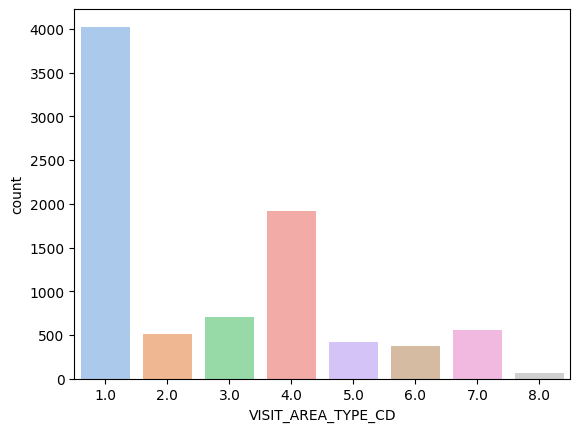

In [39]:
# 방문지유형코드
sns.countplot(data=df, x='VISIT_AREA_TYPE_CD', palette='pastel')
plt.show()

1 : 자연  


2 : 역사/유적/종교 (문화재, 박물관, 촬영지, 절 등)  


3 : 문화시설(공연장, 영화관, 전시관 등)  


4 : 상업지구(거리, 시장, 쇼핑시설)  


5 : 레저/스포츠 (스키, 카트, 수상레저)  


6 : 테마시설(놀이공원, 워터파크)  


7 : 산책로, 둘레길  


8 : 지역축제  



In [40]:
# 방문 장소 상위 20개 관광지 출력
df['VISIT_AREA_NM'].value_counts().head(20)

VISIT_AREA_NM
제주동문시장          324
서귀포 매일 올레시장     294
함덕해수욕장          260
협재해수욕장          201
성산일출봉           151
이호 테우해수욕장       115
금오름             107
곽지해수욕장          106
김녕해수욕장          104
금능해수욕장          102
오설록 티 뮤지엄        95
판포 포구            93
도두동 무지개 해안도로     93
천지연폭포            90
섭지코지             87
아르떼 뮤지엄 제주       72
사계해변             71
월정리 해수욕장         69
용머리해안            69
용두암              68
Name: count, dtype: int64

In [41]:
df.head()

TRAVEL_ID  VISIT_AREA_ID VISIT_AREA_NM     SIDO GUNGU EUPMYEON  \
3106  g_g005682   2.308280e+09    아르떼 뮤지엄 제주  제주특별자치도   제주시      애월읍   
3107  g_g005682   2.308280e+09         천지연폭포  제주특별자치도  서귀포시      서홍동   
3108  g_g005682   2.308290e+09         천제연폭포  제주특별자치도  서귀포시      중문동   
3109  g_g005682   2.308300e+09        제주동문시장  제주특별자치도   제주시     일도일동   
3110  g_g005682   2.308300e+09         바이 제주  제주특별자치도   제주시     용담삼동   

      VISIT_AREA_TYPE_CD  DGSTFN     X_COORD    Y_COORD TRAVELER_ID MVMN_NM  \
3106                 3.0     5.0  126.345011  33.396701     g005682  대중교통 등   
3107                 1.0     2.0  126.554522  33.247212     g005682  대중교통 등   
3108                 1.0     5.0  126.418375  33.252677     g005682  대중교통 등   
3109                 4.0     4.0  126.528303  33.512784     g005682  대중교통 등   
3110                 4.0     3.0  126.504123  33.516574     g005682  대중교통 등   

      GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  TRAVEL_STYL_4  TRAVEL_STYL_5  \
3106       0       20       6              5              4              6   
3107       0       20       6              5              4              6   
3108       0       20       6              5              4              6   
3109       0       20       6              5              4              6   
3110       0       20       6              5              4              6   

      TRAVEL_STYL_6  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_COMPANIONS_NUM  
3106              5              5                4                      0  
3107              5              5                4                      0  
3108              5              5                4                      0  
3109              5              5                4                      0  
3110              5              5                4                      0

In [42]:
visit_area_counts = df.groupby('VISIT_AREA_NM')['TRAVEL_ID'].count()

시장 및 해수욕장, 폭포, 오름이 많음

In [43]:
# 많이 방문한 군/구
df['GUNGU'].value_counts()

GUNGU
제주시     5095
서귀포시    3483
Name: count, dtype: int64

In [44]:
# 많이 방문한 읍/면/동
df['EUPMYEON'].value_counts().head(10)

EUPMYEON
안덕면     851
구좌읍     837
한림읍     688
애월읍     662
성산읍     614
조천읍     589
서귀동     497
일도일동    357
한경면     290
우도면     249
Name: count, dtype: int64

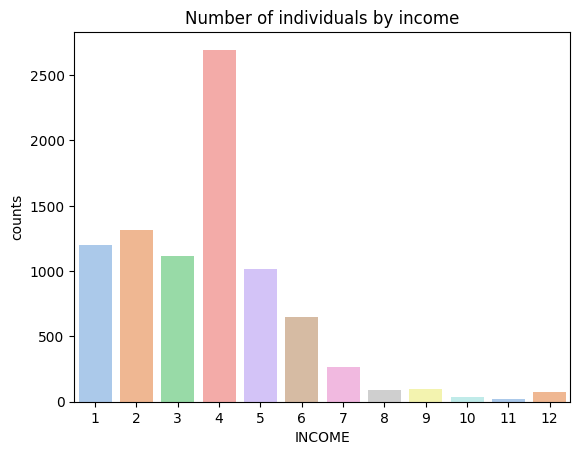

In [45]:
# 소득구간
sns.countplot(data=df, x='INCOME', palette='pastel')
plt.xlabel('INCOME')
plt.ylabel('counts')
plt.title('Number of individuals by income')
plt.show()

월평균 100만원미만 부터 월평균 1000만원 이상까지 총 12구간

이걸로 소득구간에 따른 방문 장소 타입, 여행스타일 eda 해봤는데 큰 의미 없어서 지웠음

<Axes: xlabel='DGSTFN', ylabel='count'>

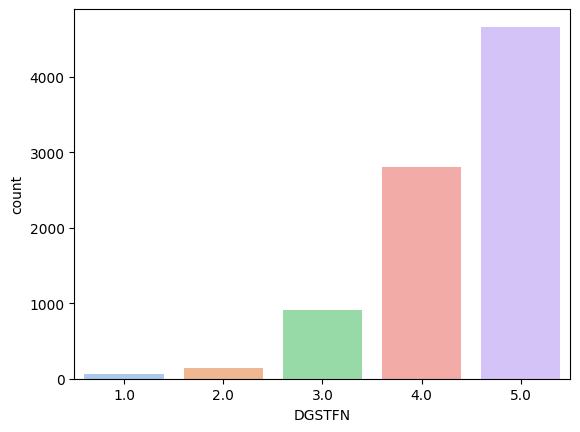

In [46]:
# 만족도
sns.countplot(data=df, x='DGSTFN', palette='pastel')

In [47]:
df['DGSTFN'].value_counts()

DGSTFN
5.0    4661
4.0    2797
3.0     913
2.0     142
1.0      65
Name: count, dtype: int64

In [48]:
# 만족도가 1인 방문지 42곳 알아보기
unsatisfied_places = df[df['DGSTFN'] == 1]
print(unsatisfied_places['VISIT_AREA_NM'].value_counts())

VISIT_AREA_NM
섭지코지                  2
용머리해안                 2
이호 테우해수욕장             2
제주관광공사 지정면세점          2
판포 포구                 2
두구리알                  1
광명식당                  1
산 물통 회수산              1
플로 웨이브                1
제주 월령리 선인장 군락         1
사계해변                  1
중문 대표 주상절리대           1
김영갑갤러리 두모악            1
애월 카페거리               1
삼무공원                  1
누워 마루 거리              1
말미 오름 입구              1
짱구네 유채꽃밭              1
만장굴                   1
윈드 1947카트 테마파크        1
방주교회                  1
마켓 제주                 1
미유 애월점                1
명호도 갈비                1
서귀포 매일 올레시장           1
산양큰엉곶                 1
사계 발자국 화석 발견지         1
서귀포자연휴양림              1
크로스핏 글라               1
한라도서관                 1
약천사                   1
아쿠아 플라넷 제주            1
서귀 본향당                1
검멀레해변                 1
박물관은 살아있다 제주 중문점      1
카멜리아힐                 1
탐라 승마장                1
사려니숲길                 1
제주 돌 문화공원             1
마틸다                   1
올레길 20코스(김녕-하도 올레)    1
올레

In [49]:
# 만족도가 1, 2인 방문지 알아보기
unsatisfied_places = df[(df['DGSTFN'] == 1) | (df['DGSTFN'] == 2)]
print(unsatisfied_places['VISIT_AREA_NM'].value_counts())

VISIT_AREA_NM
제주동문시장         10
서귀포 매일 올레시장     6
용머리해안           5
이호 테우해수욕장       5
판포 포구           4
               ..
와인숍             1
돈내코계곡           1
코코 나라           1
한림민속 5일시장       1
하우투플레이          1
Name: count, Length: 149, dtype: int64


1점이나 2점을 여러번 받은 관광지면 추천할 때 빼면 좋을 것 같다고 생각

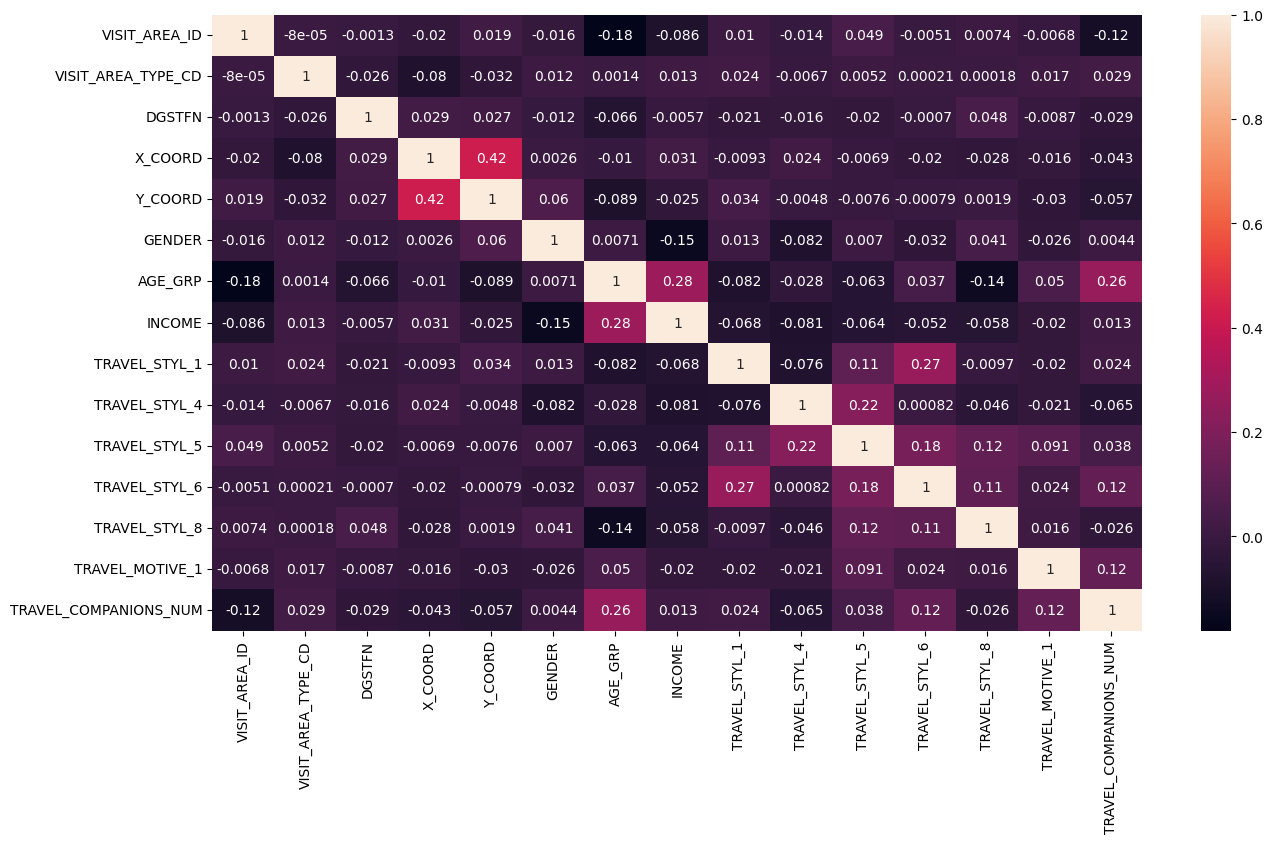

In [50]:
numeric_df = df.select_dtypes(include='number')

# 상관관계 히트맵
plt.figure(figsize=(15, 8))
sns.heatmap(data=numeric_df.corr(), cbar=True, annot=True)

plt.show()

1- 자연 vs 도시

4- 편하지만 비싼 숙소 vs 불편하지만 저렴한 숙소

5- 휴양/휴식 vs 체험활동

6- 잘 알려지지 않은 방문지 vs 알려진 방문지



---



대체로 자연이 좋은 사람들이 잘 알려지지 않은 방문지를 (1,6)

편하지만 비싼 숙소를 선호하는 사람들이 휴양/휴식을 좋아함

그러나 상관관계가 0.3 수준이므로 ...

## 숙박소비내역 EDA

### 데이터 로드

In [51]:
lodge_consume_his = pd.read_csv(path + '/tn_lodge_consume_his_숙박소비내역_H.csv')

### 변수 선택

TRAVEL_ID 여행 ID


LODGING_NM 숙소명


LODGING_TYPE_CD 숙소유형코드


PAYMENT_NUM	소비인원


ROAD_NM_ADDR  도로명주소


PAYMENT_AMT_WON 결제금액_원



In [52]:
lodge_consume_his = lodge_consume_his[['TRAVEL_ID', 'LODGING_NM', 'LODGING_TYPE_CD', 'PAYMENT_NUM', 'ROAD_NM_ADDR', 'PAYMENT_AMT_WON']]
lodge_consume_his.head()

TRAVEL_ID LODGING_NM  LODGING_TYPE_CD  PAYMENT_NUM  \
0  h_h000271   646미터퍼세크                3            2   
1  h_h000271       콴도제주                3            2   
2  h_h001184        원루프               11            4   
3  h_h001676    금호제주리조트                4            2   
4  h_h002474     바다마루펜션                3            4   

                      ROAD_NM_ADDR  PAYMENT_AMT_WON  
0        제주특별자치도 제주시 한경면 일주서로 4469                0  
1  제주특별자치도 서귀포시 남원읍 태위로151번길 14-12                0  
2               제주특별자치도 제주시 홍랑길 15                0  
3      제주특별자치도 서귀포시 남원읍 태위로 522-12                0  
4    제주특별자치도 서귀포시 표선면 표선백사로60번길 70                0

In [53]:
lodge_consume_his['LODGING_TYPE_CD'].unique()

array([ 3, 11,  4,  1,  2,  7,  8,  9,  5, 10,  6])

### 전처리 및 데이터 합치기

In [54]:
# 제주 아닌 것 + 결측값 거르기
filtered_data = lodge_consume_his[lodge_consume_his['ROAD_NM_ADDR'].str.contains('제주특별자치도') == False]
filtered_data.value_counts().sum()

1249

In [55]:
lodge_consume_his = lodge_consume_his[lodge_consume_his['ROAD_NM_ADDR'].str.contains('제주특별자치도') == True]
lodge_consume_his.head()

TRAVEL_ID LODGING_NM  LODGING_TYPE_CD  PAYMENT_NUM  \
0  h_h000271   646미터퍼세크                3            2   
1  h_h000271       콴도제주                3            2   
2  h_h001184        원루프               11            4   
3  h_h001676    금호제주리조트                4            2   
4  h_h002474     바다마루펜션                3            4   

                      ROAD_NM_ADDR  PAYMENT_AMT_WON  
0        제주특별자치도 제주시 한경면 일주서로 4469                0  
1  제주특별자치도 서귀포시 남원읍 태위로151번길 14-12                0  
2               제주특별자치도 제주시 홍랑길 15                0  
3      제주특별자치도 서귀포시 남원읍 태위로 522-12                0  
4    제주특별자치도 서귀포시 표선면 표선백사로60번길 70                0

In [56]:
# 그냥 기존에 합쳐놓은 df에 합쳤음
df = pd.merge(lodge_consume_his, df, left_on = 'TRAVEL_ID', right_on = 'TRAVEL_ID', how = 'right')

In [57]:
# 결측값 날리고
df = df.dropna()

In [58]:
# 중복데이터 확인
df.duplicated().sum()

60

In [59]:
df['LODGING_NM'].value_counts()

LODGING_NM
제주신화월드 신화관         153
한화리조트 제주           131
금호제주리조트            130
더베스트제주성산           118
베스트웨스턴 제주호텔        104
                  ... 
애월로와                 1
제주한달살기 아리아오션뷰펜션      1
올레청보리펜션              1
서건도카라반               1
프레리아 독채 & 커플펜션       1
Name: count, Length: 722, dtype: int64

In [60]:
filtered_df = df['LODGING_NM'].value_counts()[df['LODGING_NM'].value_counts() == 4]

In [61]:
filtered_df.value_counts()

count
4    47
Name: count, dtype: int64

In [62]:
# 얘도 그냥 없애기로
df = df.drop_duplicates()
df.head()

TRAVEL_ID LODGING_NM  LODGING_TYPE_CD  PAYMENT_NUM          ROAD_NM_ADDR  \
0  g_g005682   이스턴호텔 제주              1.0          1.0  제주특별자치도 서귀포시 서호중로 65   
1  g_g005682   이스턴호텔 제주              1.0          1.0  제주특별자치도 서귀포시 서호중로 65   
2  g_g005682   이스턴호텔 제주              1.0          1.0  제주특별자치도 서귀포시 서호중로 65   
3  g_g005682   이스턴호텔 제주              1.0          1.0  제주특별자치도 서귀포시 서호중로 65   
4  g_g005682   이스턴호텔 제주              1.0          1.0  제주특별자치도 서귀포시 서호중로 65   

   PAYMENT_AMT_WON  VISIT_AREA_ID VISIT_AREA_NM     SIDO GUNGU EUPMYEON  \
0          50388.0   2.308280e+09    아르떼 뮤지엄 제주  제주특별자치도   제주시      애월읍   
1          50388.0   2.308280e+09         천지연폭포  제주특별자치도  서귀포시      서홍동   
2          50388.0   2.308290e+09         천제연폭포  제주특별자치도  서귀포시      중문동   
3          50388.0   2.308300e+09        제주동문시장  제주특별자치도   제주시     일도일동   
4          50388.0   2.308300e+09         바이 제주  제주특별자치도   제주시     용담삼동   

   VISIT_AREA_TYPE_CD  DGSTFN     X_COORD    Y_COORD TRAVELER_ID MVMN_NM  \
0                 3.0     5.0  126.345011  33.396701     g005682  대중교통 등   
1                 1.0     2.0  126.554522  33.247212     g005682  대중교통 등   
2                 1.0     5.0  126.418375  33.252677     g005682  대중교통 등   
3                 4.0     4.0  126.528303  33.512784     g005682  대중교통 등   
4                 4.0     3.0  126.504123  33.516574     g005682  대중교통 등   

   GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  TRAVEL_STYL_4  TRAVEL_STYL_5  \
0       0       20       6              5              4              6   
1       0       20       6              5              4              6   
2       0       20       6              5              4              6   
3       0       20       6              5              4              6   
4       0       20       6              5              4              6   

   TRAVEL_STYL_6  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_COMPANIONS_NUM  
0              5              5                4                      0  
1              5              5                4                      0  
2              5              5                4                      0  
3              5              5                4                      0  
4              5              5                4                      0

In [63]:
df['VISIT_AREA_NM'].value_counts()

VISIT_AREA_NM
제주동문시장            401
서귀포 매일 올레시장       323
함덕해수욕장            289
협재해수욕장            254
성산일출봉             188
                 ... 
가죽면 제주 함덕점          1
함덕 오일시장             1
용머리해안 기후변화 홍보관      1
하멜기념비               1
롯데시네마 제주 삼화지구       1
Name: count, Length: 1271, dtype: int64

In [64]:
df['DGSTFN'].value_counts()

DGSTFN
5.0    5384
4.0    3336
3.0    1081
2.0     163
1.0      58
Name: count, dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10022 entries, 0 to 12749
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TRAVEL_ID              10022 non-null  object 
 1   LODGING_NM             10022 non-null  object 
 2   LODGING_TYPE_CD        10022 non-null  float64
 3   PAYMENT_NUM            10022 non-null  float64
 4   ROAD_NM_ADDR           10022 non-null  object 
 5   PAYMENT_AMT_WON        10022 non-null  float64
 6   VISIT_AREA_ID          10022 non-null  float64
 7   VISIT_AREA_NM          10022 non-null  object 
 8   SIDO                   10022 non-null  object 
 9   GUNGU                  10022 non-null  object 
 10  EUPMYEON               10022 non-null  object 
 11  VISIT_AREA_TYPE_CD     10022 non-null  float64
 12  DGSTFN                 10022 non-null  float64
 13  X_COORD                10022 non-null  float64
 14  Y_COORD                10022 non-null  float64
 15  TRAVELE

In [66]:
#추가

df['VISIT_AREA_ID']=df['VISIT_AREA_ID'].astype('object')

In [67]:
df['VISIT_AREA_ID']

0        2308280007.0
1        2308280008.0
2        2308290003.0
3        2308300003.0
4        2308300004.0
             ...     
12601    2309160007.0
12746    2309170005.0
12747    2309170006.0
12748    2309170007.0
12749    2309180003.0
Name: VISIT_AREA_ID, Length: 10022, dtype: object

### 시각화

<Axes: xlabel='LODGING_TYPE_CD', ylabel='count'>

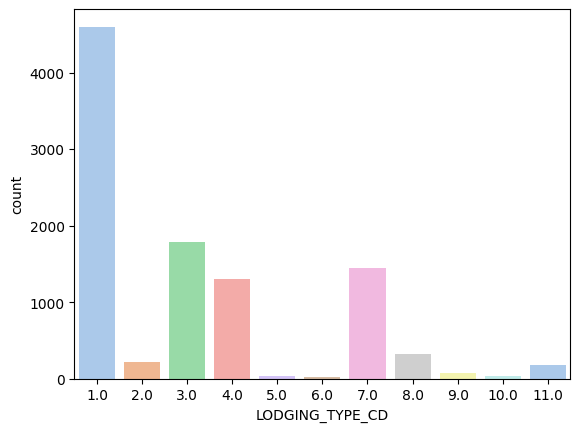

In [68]:
# 숙소유형코드별 개수
sns.countplot(data=df, x='LODGING_TYPE_CD', palette='pastel')

LODGING_TYPE_CD


1 : 호텔  
2 : 모텔/여관  
3 : 펜션  
4 : 콘도/리조트  
5 : 캠핑/글램핑  
6 : 전통 숙박시설  
7 : 게스트하우스  
8 : 민박  
9 : 자연휴양림내 시설  
10 : 가족/친지집  
11 : 기타   



---



압도적인 비율로 호텔이 제일 많고 그 뒤는 펜션 및 게스트하우스.

<Axes: xlabel='LODGING_TYPE_CD', ylabel='Count'>

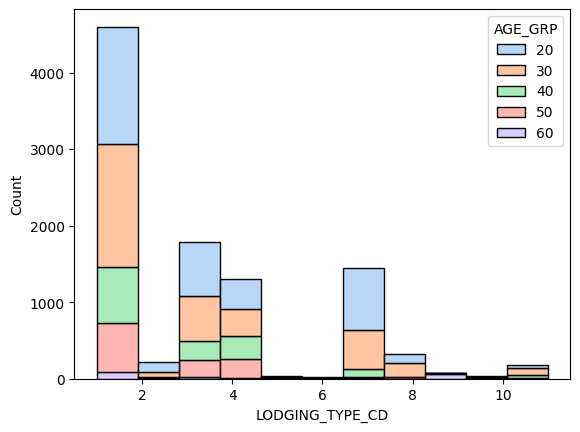

In [69]:
# 나이대에 따른 숙박유형 비율
sns.histplot(data=df, x='LODGING_TYPE_CD', palette='pastel', hue='AGE_GRP', multiple='stack', bins=11)

큰 차이없이 모두 호텔, 펜션 및 리조트를 가장 많이 이용.


굳이 언급하자면 40대 이상은 게스트하우스 이용률이 현저히 낮다  
아마 가족단위로 움직이기 때문이 아닐까

<Axes: xlabel='LODGING_TYPE_CD', ylabel='Count'>

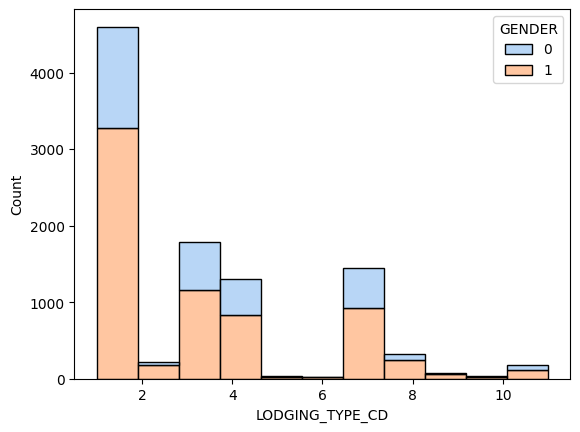

In [70]:
# 성별에 따른 숙박유형 비율
sns.histplot(data=df, x='LODGING_TYPE_CD', palette='pastel', hue='GENDER', multiple='stack', bins=11)

<Axes: xlabel='LODGING_TYPE_CD', ylabel='Count'>

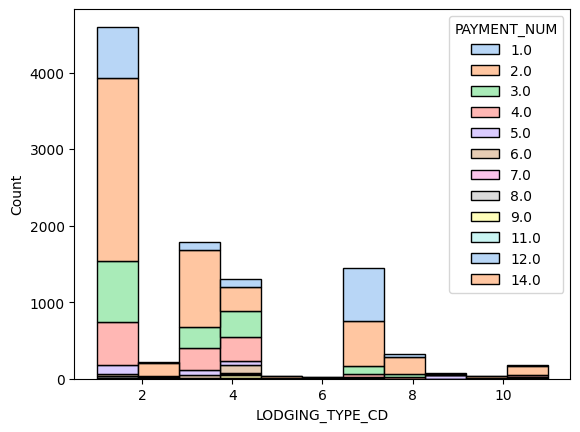

In [71]:
# 숙소 소비인원 수에 따른 숙박유형 비율
sns.histplot(data=df, x='LODGING_TYPE_CD', palette='pastel', hue='PAYMENT_NUM', multiple='stack', bins=11)

혼자 온 사람들은 게스트하우스 이용률이 높다. 둘이서 온 사람들은 주로 호텔을, 둘 이상은 호텔 > 펜션 > 리조트

In [141]:
df.to_csv('Compilation_travel_data.csv', index=False)